### About Dataset:
### Context:
#### The data contains the details of passengers onboard in Titanic and its shipwreck details.Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.
### Contents:
#### Passenger details: Age, Gender, Socio Economic Class, Adults and Kids with their relation between, Cabin Number.
### Problem:
#### Analyse and Visualize the dataset.

*Variable**|**Definition**	|**Key** 
----------|-----------------|------
Survived  |	Survival	|0 = No, 1 = Yes    
Pclass	  |  Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd 
Sex	       | Sex	
Age	        |Age in years	
Sibsp	    |# of siblings / spouses aboard the Titanic	
Parch	    |# of parents / children aboard the Titanic	
Ticket	    |Ticket number	
Fare	    |Passenger fare	
Cabin	    |Cabin number	
Embarked	|Port of Embarkation |C = Cherbourg, Q = Queenstown,S = Southampton

**Pclass**: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**Sibsp**: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

**Parch**: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them. 

In [1]:
# Importing Libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Defing default sizes for plots:
SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

### Data Acquisition

In [3]:
#Load the CSV into a Pandas Dataframe
titanic_data = pd.read_csv("titanic-data.csv")

In [4]:
# Data Description:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning and Transformation:

In [6]:
#Dropping Columns(Cabin,Ticket, Name,Fare,PassengerId- missing common values)
n_titanic_data=titanic_data.drop(['Cabin','Ticket','Name',
                                  'Fare','PassengerId'],axis=1)

In [7]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
n_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
n_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


We have only 714 -Age values out of 891 of the entries and 2 values missing from Embarked Variable and choose to drop them as there is lack of consistency between analyzed subsets. 

### Analysis and Visualization

In [10]:
#Changing keys to readable format and exploring initial composition of the passengers.
descript = n_titanic_data.copy()

#Change the embarked keys to better readable ones
descript.loc[:,'Embarked'].replace(['C','S','Q'],['Cherbourg','Southampton','Queenstown'],inplace=True)

#And the survived keys
descript.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

In [11]:
descript.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,No,3,male,22.0,1,0,Southampton
1,Yes,1,female,38.0,1,0,Cherbourg
2,Yes,3,female,26.0,0,0,Southampton
3,Yes,1,female,35.0,1,0,Southampton
4,No,3,male,35.0,0,0,Southampton
5,No,3,male,NaN,0,0,Queenstown
6,No,1,male,54.0,0,0,Southampton
7,No,3,male,2.0,3,1,Southampton
8,Yes,3,female,27.0,0,2,Southampton
9,Yes,2,female,14.0,1,0,Cherbourg


#### Analysis for Embarked variable.

In [12]:
def Groupby_OneCol_comp_plot(df, col, plt_style='ticks', color_palette='Set2'):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    '''
    gr = pd.DataFrame() 
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum()) * 100, 0)

    print('Total No. of {}:{}'.format(col, gr['{} No'.format(col)].sum()))

    sns.set_style(plt_style)
    sns.set_palette(sns.color_palette(color_palette))

    fig = plt.figure()
    plt.axis('off')

    fig.add_subplot(121)

    ax = gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16, 8),
                                      color=sns.color_palette())
    plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:, '{} Ratio'.format(col)].plot(kind='pie',
                                           autopct='%1.1f%%', shadow=False,
                                           title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

Total No. of Embarked:889


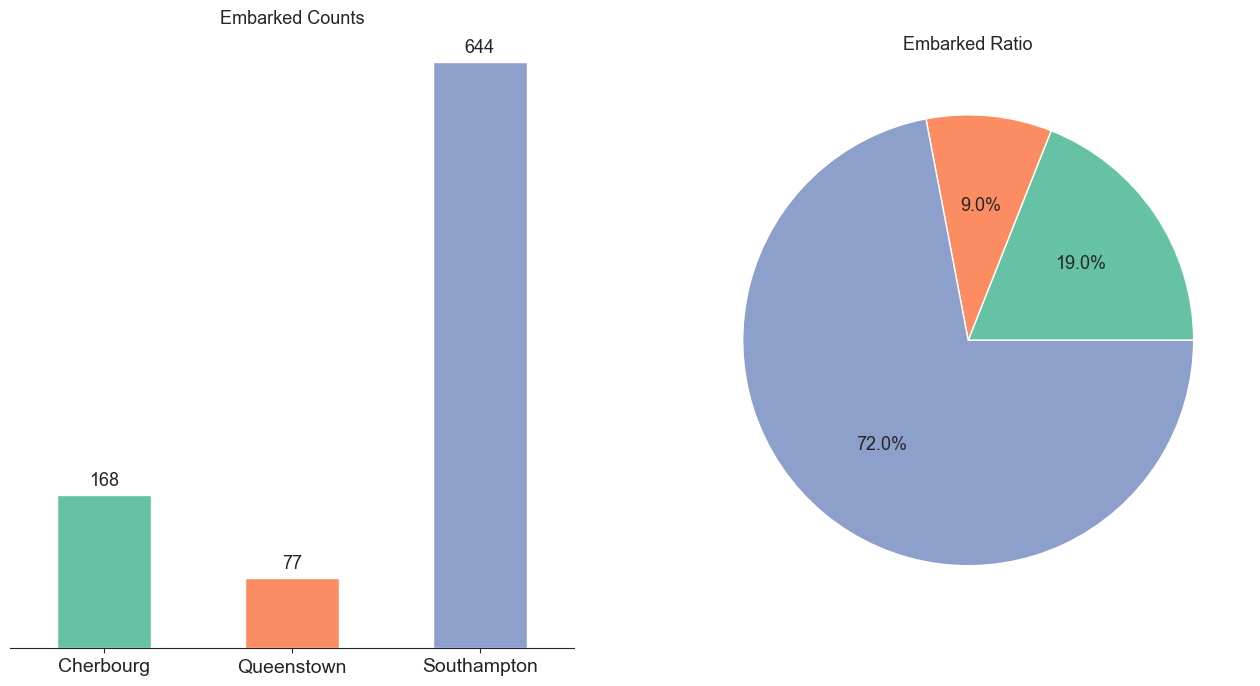

In [13]:
Groupby_OneCol_comp_plot(descript, 'Embarked')

* Majority of passengers (644 of 889 :72%) embarked in Southampton. 
* Less number of passengers(77 of 889:9%) embarked in Queenstown.

#### Correlation between Survived with Embarked.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot(table, legloc='upper right', plt_style='ticks', color_palette="dark",
         sorter=None, stacked=False, kind='bar', percentage=True, custom_title=None,
         minimal=True, figsize=(19, 10), width=0.7):
    
    grouped = table
    
    if percentage:
        grouped = np.round(grouped.divide(grouped['Total'], axis=0) * 100, 0)
    
    try:   
        del grouped['Total']
    except:
        pass
    
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind, stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    plt.legend(loc=legloc)
    
    if percentage:
        for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(), decimals=2))),
                         (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                         xytext=(0, 10), textcoords='offset points')
    else:
        for p in ax.patches:
            ax.annotate(np.round(p.get_height(), decimals=2),
                        (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                        xytext=(0, 10), textcoords='offset points')
    
    if minimal:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False)
    
    plt.title(custom_title)

def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right', plt_style='ggplot',
                        color_palette="dark", sorter=None, stacked=False,
                        kind='bar', percentage=True, custom_title=None,
                        minimal=True, figsize=(14, 6), width=0.6):   
    
    grouped = df.groupby([col2,col1]).size().unstack(col2)
    grouped['Total'] = grouped.sum(axis=1)
   
    plot(grouped, legloc=legloc, plt_style=plt_style, color_palette=color_palette,
         sorter=sorter, stacked=stacked, kind=kind, percentage=percentage,
         custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)


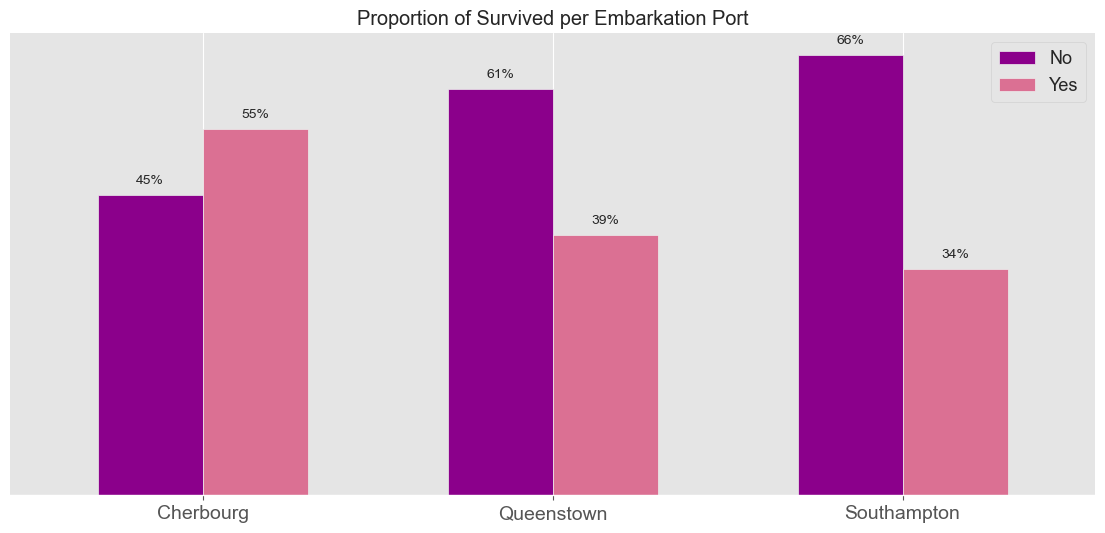

In [15]:
Groupby_TwoCol_Plot(descript, 'Embarked', 'Survived', color_palette=('darkmagenta','palevioletred'),
                    custom_title='Proportion of Survived per Embarkation Port')

* 55% of passengers embarked in Cherbourg survived compared to 34% and 39% at Southhampton and Queensberg respectively.

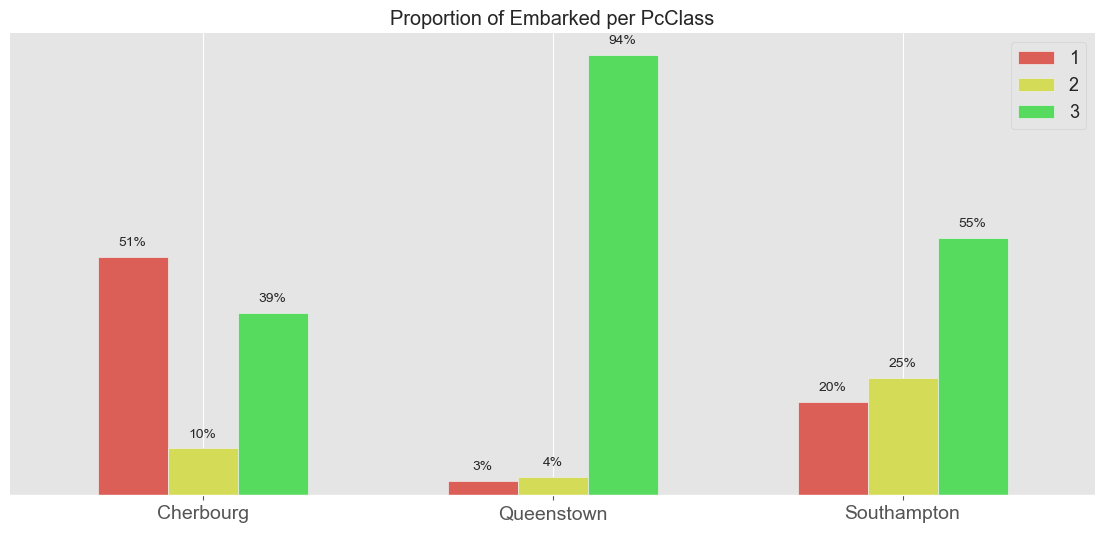

In [16]:
Groupby_TwoCol_Plot(descript, 'Embarked', 'Pclass', color_palette=('hls'),
                    custom_title='Proportion of Embarked per PcClass', sorter=[1,2,3])

* 51% of the passengers embarked in Cherbourg are in the 1st Pclass compared to 20% and 3% respectively for Southhampton and Queenstown.
* It looks like the class may play a role in port of embarkation's relationship with survibability.

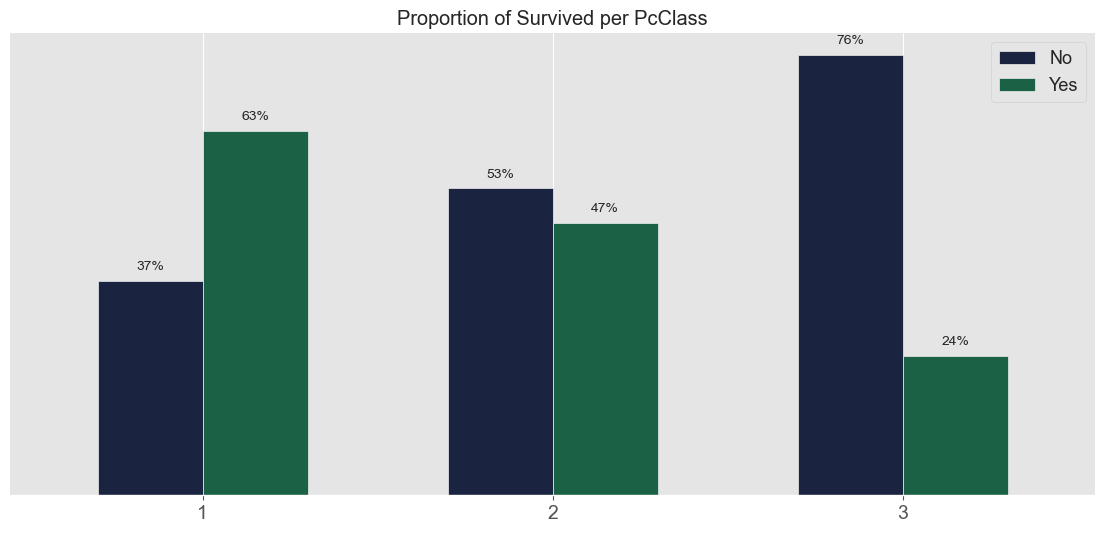

In [17]:
# Correlation of Survived with Pclass
Groupby_TwoCol_Plot(descript, 'Pclass', 'Survived', color_palette=('cubehelix'),
                    custom_title='Proportion of Survived per PcClass')

* 63% of 1st class passengers survived compared to 47% and 24% for the 2nd and 3rd class respectively.
* Survivability seems to be correlated with the Pcclass and this could be the main factor behind the correlation with the port of embarkation as well.

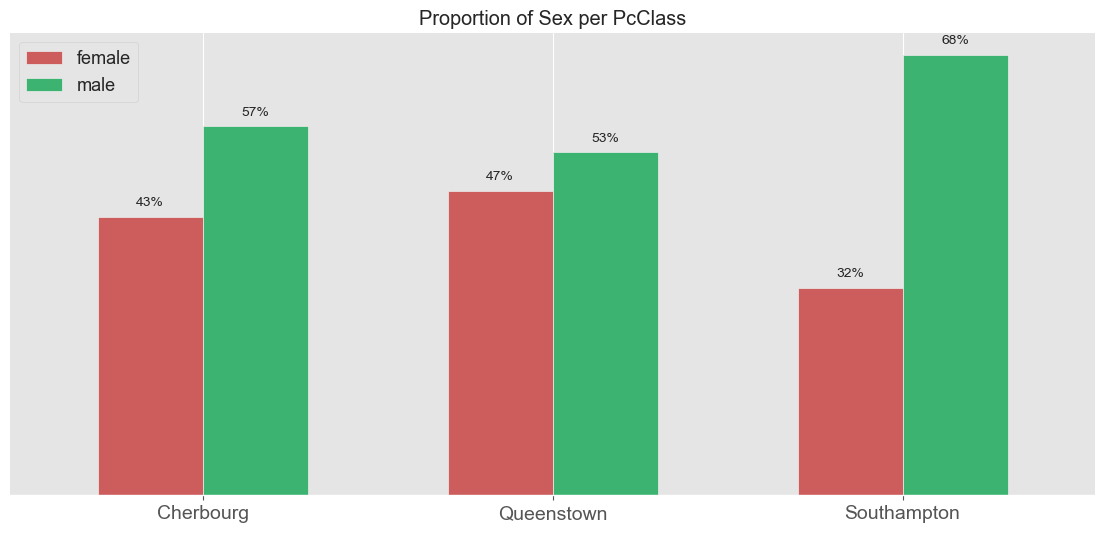

In [18]:
# Correlation of Embarked with Sex.
#Calculate percentages of port passengers per Sex
Groupby_TwoCol_Plot(descript, 'Embarked', 'Sex', color_palette=('indianred','mediumseagreen'),
                    custom_title='Proportion of Sex per PcClass', legloc='upper left')

There does not seem to be a clear pattern related to Gender that could be contributing to the increased survivability of the Cherbourg passengers.

Total No. of Sex:891


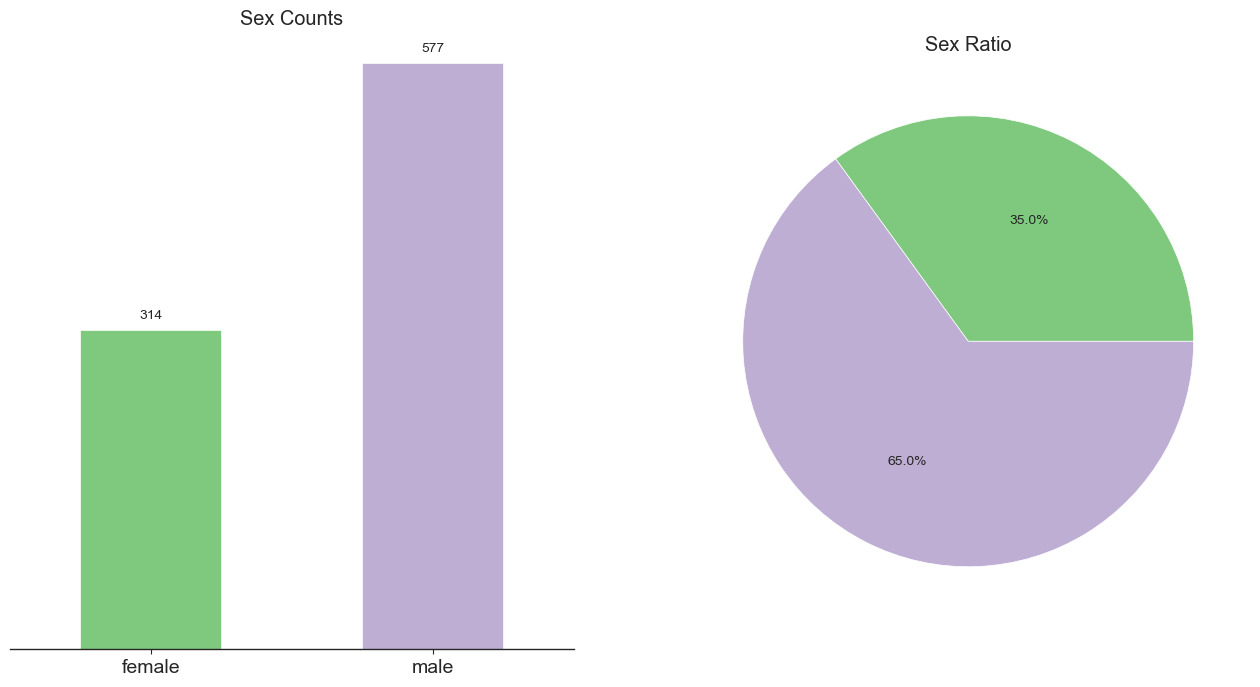

In [19]:
# Sex ratio of passengers
Groupby_OneCol_comp_plot(descript, 'Sex', color_palette = ('Accent') )

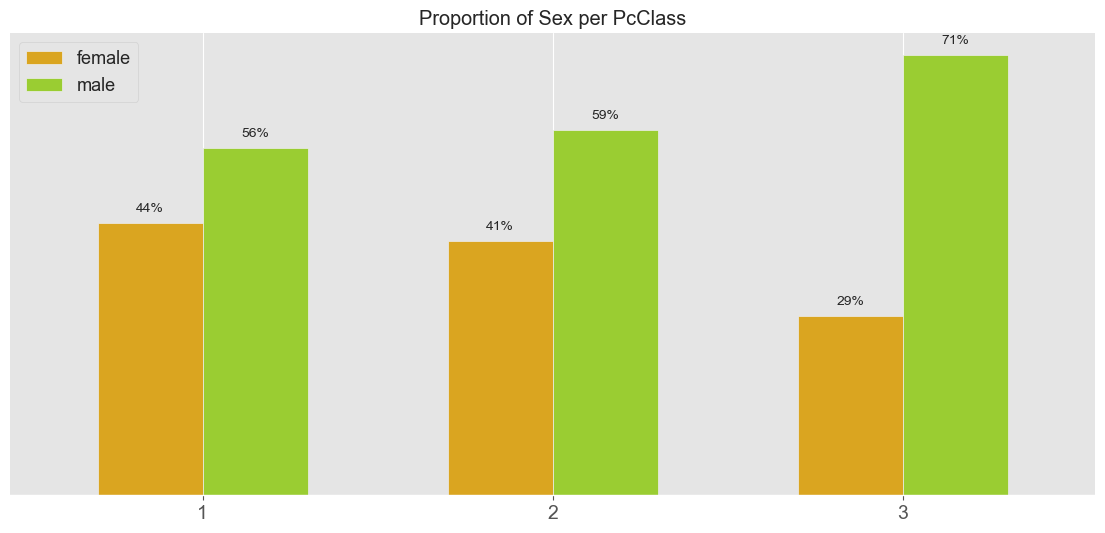

In [20]:
# Correlation of Sex with Pclass.
# Calculate percentages of Pclass per Sex
Groupby_TwoCol_Plot(descript, 'Pclass', 'Sex', color_palette=('goldenrod','yellowgreen'),
                    custom_title='Proportion of Sex per PcClass', legloc='upper left')

* We observe that the 3rd class has a higher than average (71 % vs 65%) male percentage.

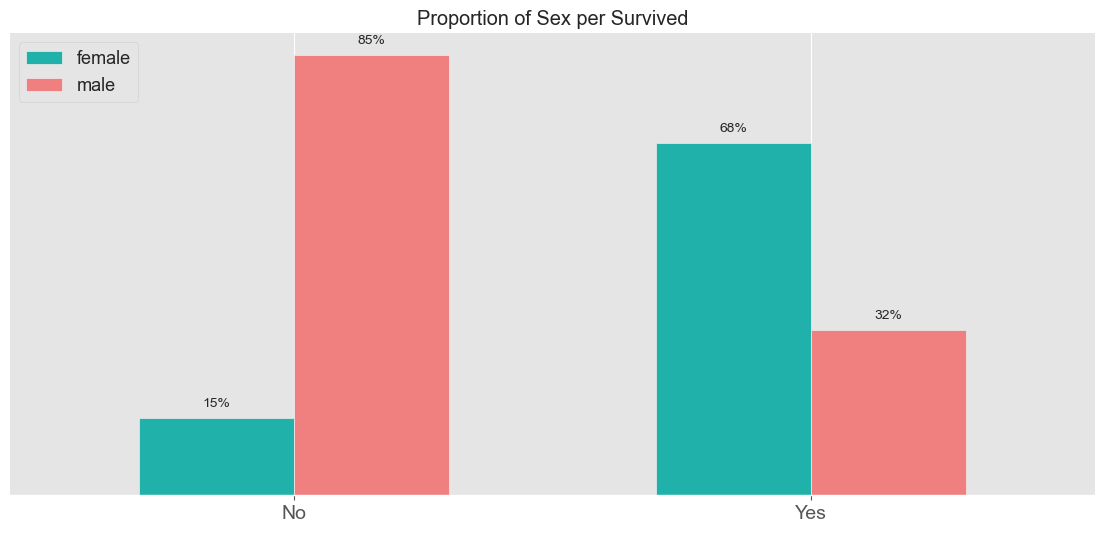

In [21]:
# Correlation of Sex with Survived
Groupby_TwoCol_Plot(descript, 'Survived', 'Sex', color_palette=('lightseagreen','lightcoral'),
                    custom_title='Proportion of Sex per Survived', legloc='upper left')

* 74% of females survived compared to 19% for males.
* 44% of the 1st class(which had a 65% survivability) comprised of females compared to 29% of the third class (24% survivability). 

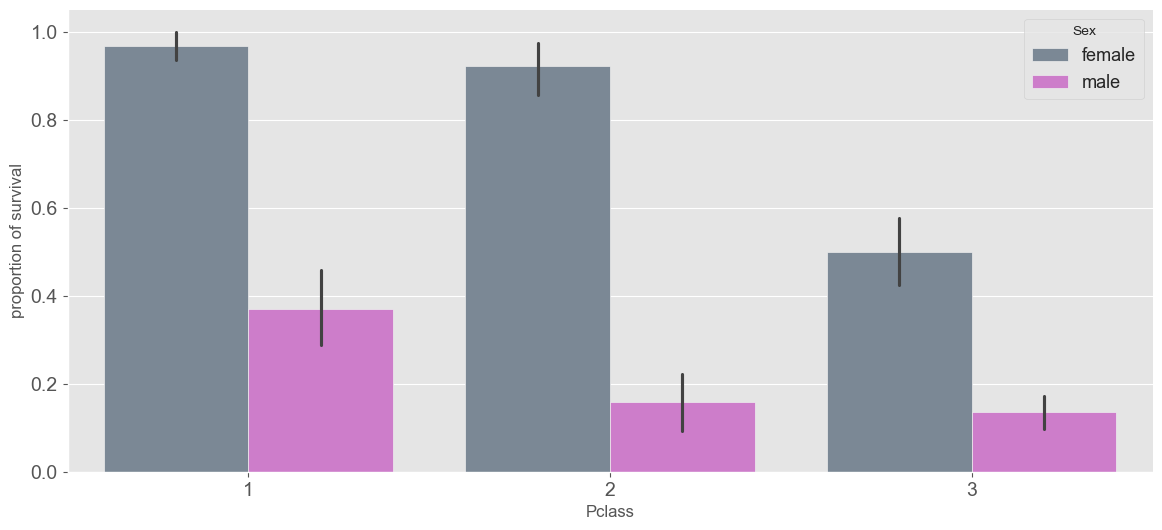

In [22]:
# Correlation of Survived with Sex and Pclass.

plt.figure(figsize=(14,6))
sns.set_palette(sns.color_palette(('lightslategrey','orchid')))
sns.barplot(data=n_titanic_data, x="Pclass", hue='Sex', y='Survived', estimator=np.mean);
plt.ylabel('proportion of survival')
sns.despine(top=True, right=True, left=False, bottom=False);

* The proportion of survival for females in the first class was almost 100% in the first class compared to 50% in the third class.
* Age together with the Class have a compound effect on survivability as well as on the correlation of other variables to survivability.

In [23]:
# Analysis of the Age variable
# Make a dataframe for non-missing 'Age' values
not_missing = n_titanic_data[n_titanic_data['Age'].notnull()].copy()

# Replace the 'Survived' values with 'No' and 'Yes'
not_missing['Survived'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [24]:
print ('No. of Passengers with not missing Age Values:{}'.format(len(not_missing)))

No. of Passengers with not missing Age Values:714


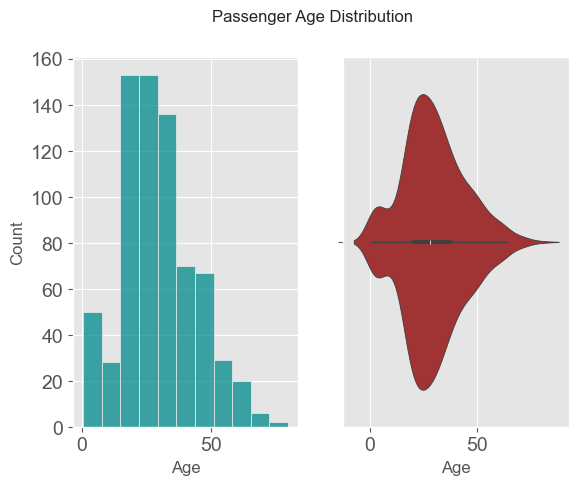

In [25]:
fig = plt.figure()
plt.suptitle('Passenger Age Distribution')

ax1 = fig.add_subplot(121)
sns.histplot(not_missing['Age'], bins=11, ax=ax1,color='darkcyan')

ax2 = fig.add_subplot(122)
sns.violinplot(x=not_missing['Age'], ax=ax2,color='firebrick')

plt.show()

In [26]:
# Get summary descriptive statistics
v= pd.DataFrame(not_missing['Age'].describe())

#Change the index labels and round the values reported
v.index = ['Population Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
v = v.round(decimals=3)
v

,Age
Population Size,714.000
Mean,29.699
Std. Deviation,14.526
Min,0.420
25% Qt,20.125
Median,28.000
75% Qt,38.000
Max,80.000


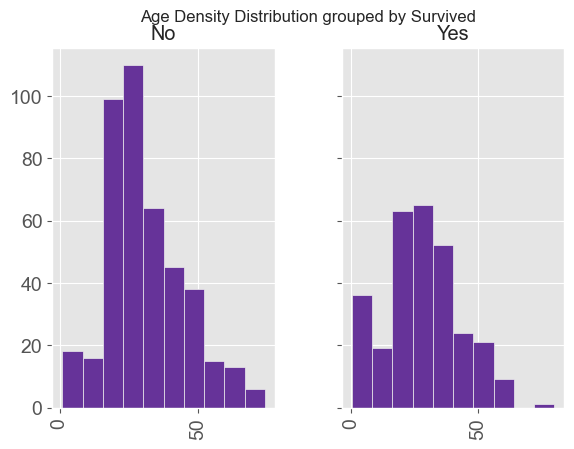

In [27]:
# The density distribution and boxplot of the Age variable depending by survivability.
not_missing.hist(column="Age", by="Survived", sharey=True, color='rebeccapurple')
plt.suptitle('Age Density Distribution grouped by Survived');

* We observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived.
* This could be because of underlying reason:'Women and Children first' rule.

In [28]:
#Make a datframe with the sample populations
age = pd.DataFrame()
age['all'] = not_missing['Age']
not_survived = age['Not-survived'] = not_missing['Age'][not_missing['Survived']=='No']
survived = age['Survived'] = not_missing['Age'][not_missing['Survived']=='Yes']

#Get the summary statistics
var = age.describe()

#Change the index labels and round the values reported
var.index = ['Sample Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
var = var.round(decimals=3)

In [29]:
var.loc[:,['Not-survived','Survived']]

,Not-survived,Survived
Sample Size,424.000,290.000
Mean,30.626,28.344
Std. Deviation,14.172,14.951
Min,1.000,0.420
25% Qt,21.000,19.000
Median,28.000,28.000
75% Qt,39.000,36.000
Max,74.000,80.000


* The not-survived and survived age populations have the above descriptive statistics:

#### Statistical Chi-Squared Test for Survived and Age

In [30]:
#Create age-groups
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
              '70-80']
age_group_values = pd.cut(not_missing.Age, range(0,81,10),
                                   right=False, labels=age_labels)
not_missing.loc[:,'age-groups'] = age_group_values

#Set the value for the one 80-year old outside the bins 
#chi-squared is notvalid for no of observations below 5
not_missing.loc[not_missing['Age']>=80, 'age-groups'] = '70-80'

#Make an observed-table for chi-squared test
obs_table = pd.crosstab([not_missing['Survived']],[not_missing['age-groups']])

In [31]:
obs_table

age-groups,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived,,,,,,,,
No,24,61,143,94,55,28,13,6
Yes,38,41,77,73,34,20,6,1


In [32]:
from scipy.stats import chi2_contingency

# Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

# Report results
print(' Chi-square: {}\n Degrees of Freedom: {}\n P-Value: {}'.format(chi2, dof, p))


 Chi-square: 17.42772160585894
 Degrees of Freedom: 7
 P-Value: 0.014836878112813482


* P-value is lesser than 0.05, therefore we reject the Null-Hypothesis and accept that Survived and Age are dependent variables and there is indeed a relationship between age and survivability.